   Delivery_Time  Agent_Rating  Cluster
0            120           4.9        2
1            165           4.5        2
2            130           4.4        2
3            105           4.7        0
4            150           4.6        2


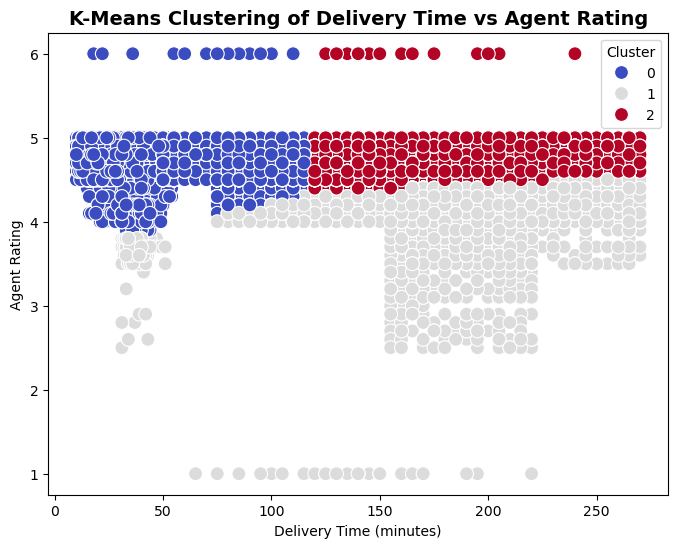

Silhouette Score: 0.38


In [15]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Load the dataset (replace with correct path)
file_path = '../data/raw_data.csv'
df = pd.read_csv(file_path)

# ✅ Handle Missing Values
# Fill missing values for Delivery_Time and Agent_Rating using mean
df.loc[:, 'Delivery_Time'] = df['Delivery_Time'].fillna(df['Delivery_Time'].mean())
df.loc[:, 'Agent_Rating'] = df['Agent_Rating'].fillna(df['Agent_Rating'].mean())

# ✅ Scale the Data
# Scale 'Delivery_Time' and 'Agent_Rating' using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df[['Delivery_Time', 'Agent_Rating']])

# ✅ K-Means Clustering
# Create KMeans model with 3 clusters and fit data
kmeans = KMeans(n_clusters=3, random_state=42)
df.loc[:, 'Cluster'] = kmeans.fit_predict(X)

# ✅ Check Output
# Display first 5 rows of relevant columns
print(df[['Delivery_Time', 'Agent_Rating', 'Cluster']].head())

# ✅ Plot Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Delivery_Time'], 
                y=df['Agent_Rating'], 
                hue=df['Cluster'], 
                palette='coolwarm', 
                s=100)

# ✅ Plot Styling
plt.title('K-Means Clustering of Delivery Time vs Agent Rating', fontsize=14, fontweight='bold')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Agent Rating')
plt.legend(title='Cluster')
plt.show()

# ✅ Evaluate Performance using Silhouette Score
score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {score:.2f}')
